In [100]:
%matplotlib inline

In [101]:
import numpy as np
import pylab as plt
from glob import glob
import os
import math
import sys
# sys.path.insert(0,r"C:\Program Files\xraylib 64-bit\Python")
import xraylib
import scipy.signal 
from glob import glob
import scipy.integrate as spint


In [102]:
def absorb(E, material, s, r): 
    """
    This function calculate the intensity of the radiation given absorption.
    
    :param E: voltage x-ray tube
    :param material: absorbing layer
    :param s: the thickness of the absorbing layer
    :returns: intensity with absorption
    """
    A = np.exp(-xraylib.CS_Total_CP(material, E)*r*s)
    return A


In [103]:
# моделирование спектра тормозного излучения
def func(E, Ek):    
    i = 10
    z=42 # порядковый номер элемента анода(молибден)
    res = z*i*(Ek*E/12.39)**2*(Ek-E)/12.39
    return res

In [104]:
# моделирование спектра тормозного излучения для ц.м.
def CMfunc(E, Ek):    
    i = 10
    z=42 # порядковый номер элемента анода(молибден)
    res = z*i*E*(Ek*E/12.39)**2*(Ek-E)/12.39
    return res

In [105]:
# моделирование спектра тормозного излучения для E^3
def E3func(E, Ek):    
    i = 10
    z=42 # порядковый номер элемента анода(молибден)
    res = z*i*E*E*E*(Ek*E/12.39)**2*(Ek-E)/12.39
    return res

In [106]:
def E3(E):   
    res = E**3
    return res

In [107]:
# поглощение
def absfunc(E, Ek, material1, material2, s1, s2, r1, r2):
    
    """
    This function calculate the intensity of the radiation given absorption.
    
    :param E: voltage x-ray tube
    :param material: absorbing layer
    :param s: the thickness of the absorbing layer
    :returns: intensity with absorption
    """
    i = 10
    z=42 # порядковый номер элемента анода(молибден)
    res = z*i*(Ek*E/12.39)**2*(Ek-E)/12.39
    res *= np.exp(-xraylib.CS_Total_CP(material1, E)*r1*s1)
    res *= np.exp(-xraylib.CS_Total_CP(material2, E)*r2*s2)
    return res

Text(0,0.5,'Intensity')

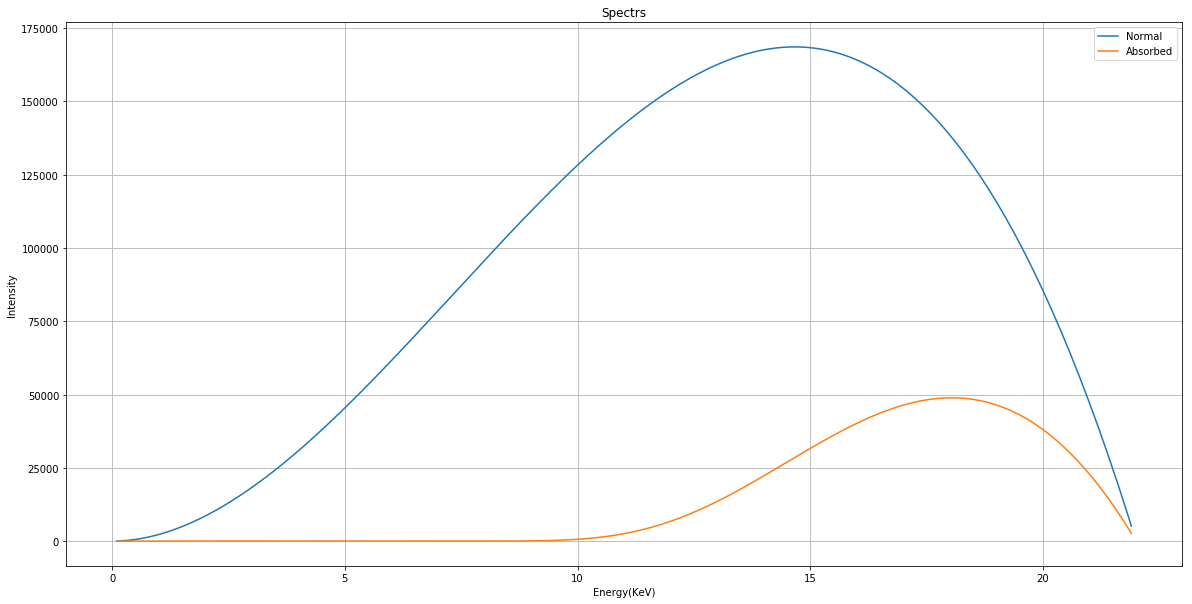

In [108]:
# спектр поглощенного(на 1 см воды) и непоглощенного излучения
Ekr = 22 #np.arange(10, 100, 10)

plt.figure(figsize=(20,10))
E = np.arange(0.1, Ekr, 0.1)
Etemp = []
Ea = []
Etemp_new = []

for e in E:
    Etemp.append(func(e, Ekr)) 
    Ea.append(func(e, Ekr)*absorb(e, 'H2O', 1, 1)) 

plt.plot(E, Etemp, label='Normal')
plt.plot(E, Ea, label='Absorbed')
plt.grid(True)
plt.legend(loc=0)
plt.title('Spectrs')
plt.xlabel('Energy(KeV)')
plt.ylabel('Intensity')

Text(0,0.5,'Attitude')

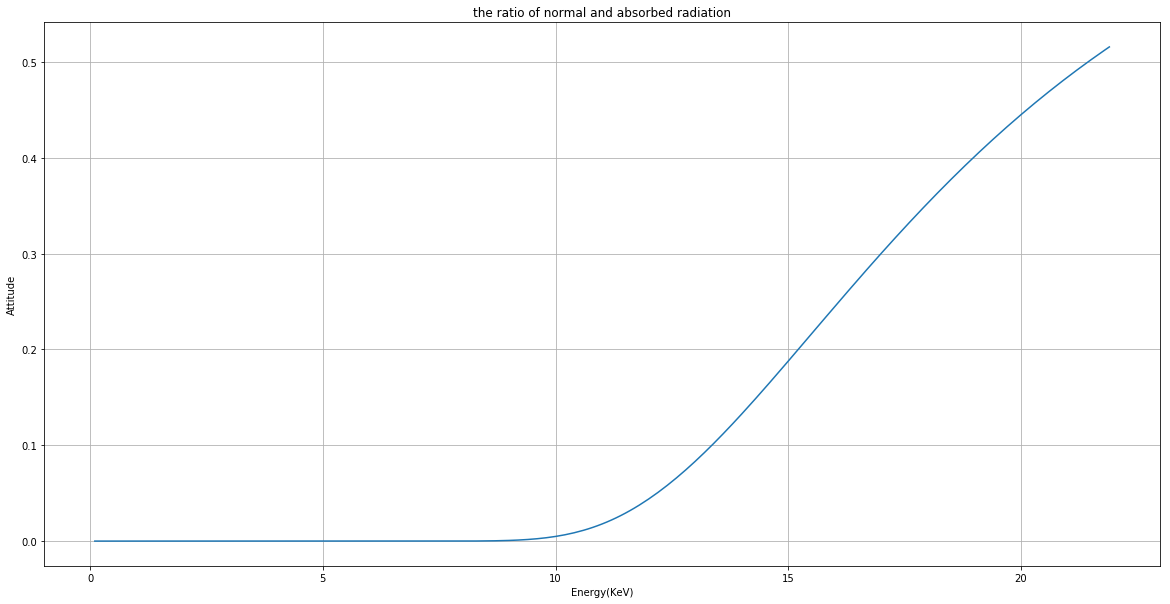

In [109]:
plt.figure(figsize=(20,10))

Eo = []

Eo = np.asarray(Ea)/np.asarray(Etemp) 

plt.plot(E, Eo)
plt.grid(True)
# plt.legend(loc=0)
plt.title('the ratio of normal and absorbed radiation')
plt.xlabel('Energy(KeV)')
plt.ylabel('Attitude')

In [110]:
# заполнение двумерного массива интенсивностей при расчете на энергии центра масс спектра

M1 = spint.quad(CMfunc, 0, Ekr, args=(Ekr))
M2 = spint.quad(func, 0, Ekr, args=(Ekr))
E = M1[0]/M2[0]

t0 = 1/5*0.009
t = 0
m = 360 
n = 240


MasCM = [[func(E,Ekr)] * m for j in range(n)]

for j in range(0, n, 1):
    for i in range(0, m, 1):
        if i>=130 and i<=180:
            t = 0.02*np.sqrt(2500 - (50 - i + 130)**2)            
        elif i>180 and i<=230:
            t = 0.02*np.sqrt(2500 - (i - 180)**2)

        MasCM[j][i] = func(E,Ekr)*absorb(E, 'H2O', t, 1)
            
for j in range(0, n, 1):
    for i in range(0, m, 1):
        if i>=118 and i<=180:
            t = 0.02*np.sqrt(3844 - (62 - i + 118)**2)
            if i>=130 and i<=180:
                t = t - 0.02*np.sqrt(2500 - (50 - i + 130)**2)

        if i>180 and i<=242:
            t = 0.02*np.sqrt(3844 - (i - 180)**2)
            if i>180 and i<=230:
                t = t - 0.02*np.sqrt(2500 - (i - 180)**2)
                
        MasCM[j][i] = MasCM[j][i]*absorb(E, 'C3H6', t, 0.91)
            

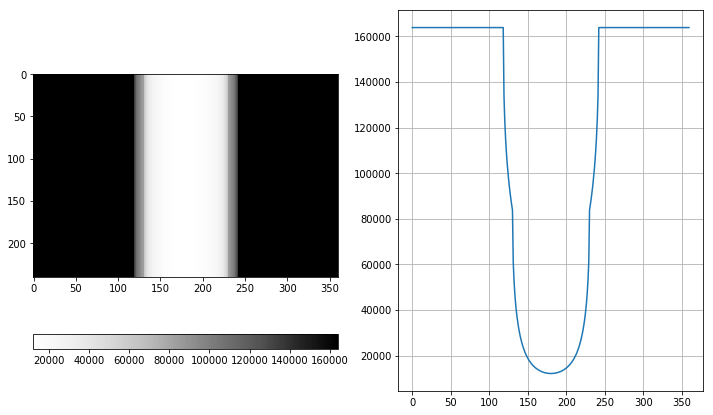

In [111]:
plt.figure(figsize=(12,7))
plt.subplot(121)
plt.imshow(MasCM, cmap=plt.cm.Greys)
plt.colorbar(orientation='horizontal')
plt.subplot(122)
plt.plot(MasCM[0])
plt.grid()
plt.show()

C:\Artem\python3.6\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  del sys.path[0]
C:\Artem\python3.6\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Artem\python3.6\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


Text(0,0.5,'Attitude')

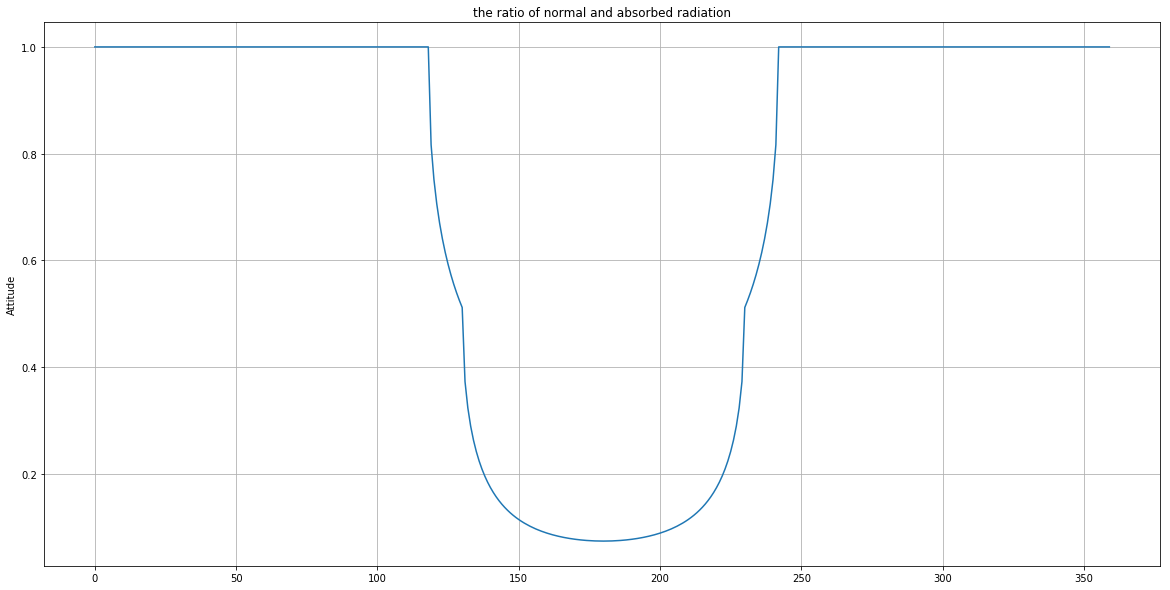

In [112]:
# Ц.М.
plt.figure(figsize=(20,10))

j = 5
TeorCM = []
l = []

for i in range(0, m, 1):
    TeorCM.append(MasCM[j][i]/MasCM[j][0])
    l.append(i)


plt.hold(True)
plt.plot(l, TeorCM)
plt.grid(True)
plt.legend(loc=0)
plt.title('the ratio of normal and absorbed radiation')
#plt.xlabel('Energy(KeV)')
plt.ylabel('Attitude')

In [113]:
# заполнение двумерного массива интенсивностей при расчете на энергии E^3

M1 = spint.quad(E3func, 0, Ekr, args=(Ekr))
M2 = spint.quad(E3, 0, Ekr)
E = M1[0]/M2[0]

t0 = 1/5*0.009
t = 0
m = 360 
n = 240


MasCM = [[func(E,Ekr)] * m for j in range(n)]

for j in range(0, n, 1):
    for i in range(0, m, 1):
        if i>=130 and i<=180:
            t = 0.02*np.sqrt(2500 - (50 - i + 130)**2)            
        elif i>180 and i<=230:
            t = 0.02*np.sqrt(2500 - (i - 180)**2)

        MasCM[j][i] = func(E,Ekr)*absorb(E, 'H2O', t, 1)
            
for j in range(0, n, 1):
    for i in range(0, m, 1):
        if i>=118 and i<=180:
            t = 0.02*np.sqrt(3844 - (62 - i + 118)**2)
            if i>=130 and i<=180:
                t = t - 0.02*np.sqrt(2500 - (50 - i + 130)**2)

        if i>180 and i<=242:
            t = 0.02*np.sqrt(3844 - (i - 180)**2)
            if i>180 and i<=230:
                t = t - 0.02*np.sqrt(2500 - (i - 180)**2)
                
        MasCM[j][i] = MasCM[j][i]*absorb(E, 'C3H6', t, 0.91)

In [114]:
M1 = spint.quad(E3func, 0, Ekr, args=(Ekr))
M2 = spint.quad(func, 0, Ekr, args=(Ekr))
E = M1[0]/M2[0]
print(E)

3042.2857142857138


In [115]:
# заполнение двумерного массива интенсивностей при расчете на 2/3 критической энергии
E = 2./3*Ekr
t0 = 1/5*0.009
t = 0
m = 360 
n = 240


Mas = [[func(E,Ekr)] * m for j in range(n)]

for j in range(0, n, 1):
    for i in range(0, m, 1):
        if i>=130 and i<=180:
            t = 0.02*np.sqrt(2500 - (50 - i + 130)**2)            
        elif i>180 and i<=230:
            t = 0.02*np.sqrt(2500 - (i - 180)**2)

        Mas[j][i] = func(E,Ekr)*absorb(E, 'H2O', t, 1)
            
for j in range(0, n, 1):
    for i in range(0, m, 1):
        if i>=118 and i<=180:
            t = 0.02*np.sqrt(3844 - (62 - i + 118)**2)
            if i>=130 and i<=180:
                t = t - 0.02*np.sqrt(2500 - (50 - i + 130)**2)

        if i>180 and i<=242:
            t = 0.02*np.sqrt(3844 - (i - 180)**2)
            if i>180 and i<=230:
                t = t - 0.02*np.sqrt(2500 - (i - 180)**2)
                
        Mas[j][i] = Mas[j][i]*absorb(E, 'C3H6', t, 0.91)
            

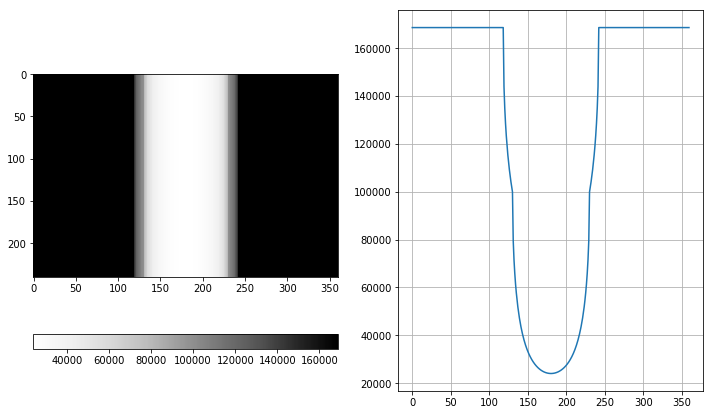

In [116]:
plt.figure(figsize=(12,7))
plt.subplot(121)
plt.imshow(Mas, cmap=plt.cm.Greys)
plt.colorbar(orientation='horizontal')
plt.subplot(122)
plt.plot(Mas[0])
plt.grid()
plt.show()

In [117]:
# заполнение массива интенсивностей для полихроматики
t0 = 1/5*0.009
t = 0
t1 =0
m = 360 
n = 240
temp = spint.quad(absfunc, 0, Ekr, args=(Ekr, 'H2O', 'C3H6', 0, 0, 1, 0.91))

MasPoli = np.ones((n,m))*temp[0]
# MasPoli = [[temp[0]] * m for j in range(n)]
            

for i in range(MasPoli.shape[1]):
    t1 = 0
    if i>=118 and i<=180:
        t1 = 0.02*np.sqrt(3844 - (180 - i)**2)
        t = 0
        if i>=130 and i<=180:
            t = 0.02*np.sqrt(2500 - (180 - i)**2)
            t1 = t1 - t
        temp = spint.quad(absfunc, 0, Ekr, args=(Ekr, 'H2O', 'C3H6', t, t1, 1, 0.91))
        MasPoli[0][i] = temp[0]
    if i>180 and i<=242:
        t1 = 0.02*np.sqrt(3844 - (i - 180)**2)
        t = 0
        if i>180 and i<=230:
            t = 0.02*np.sqrt(2500 - (i - 180)**2)
            t1 = t1 - t
        temp = spint.quad(absfunc, 0, Ekr, args=(Ekr, 'H2O', 'C3H6', t, t1, 1, 0.91))
        MasPoli[0][i] = temp[0]
            
for j in range(MasPoli.shape[0]):
    MasPoli[j] = MasPoli[0]
            

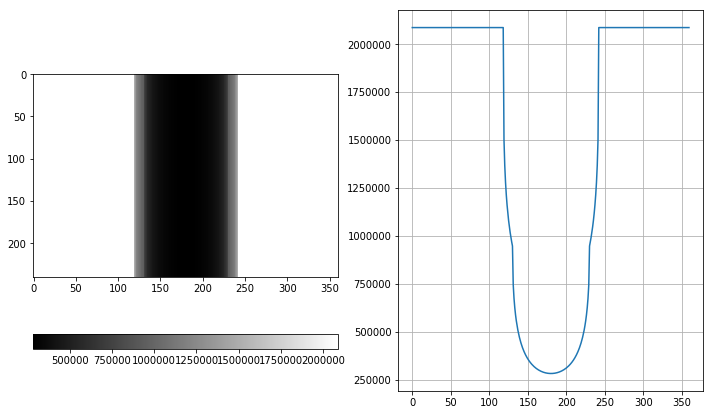

In [118]:
plt.figure(figsize=(12,7))
plt.subplot(121)
plt.imshow(MasPoli, cmap=plt.cm.gray)
plt.colorbar(orientation='horizontal')
plt.subplot(122)
plt.plot(MasPoli[0])
plt.grid()
plt.show()

C:\Artem\python3.6\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  del sys.path[0]
C:\Artem\python3.6\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Artem\python3.6\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


Text(0,0.5,'Attitude')

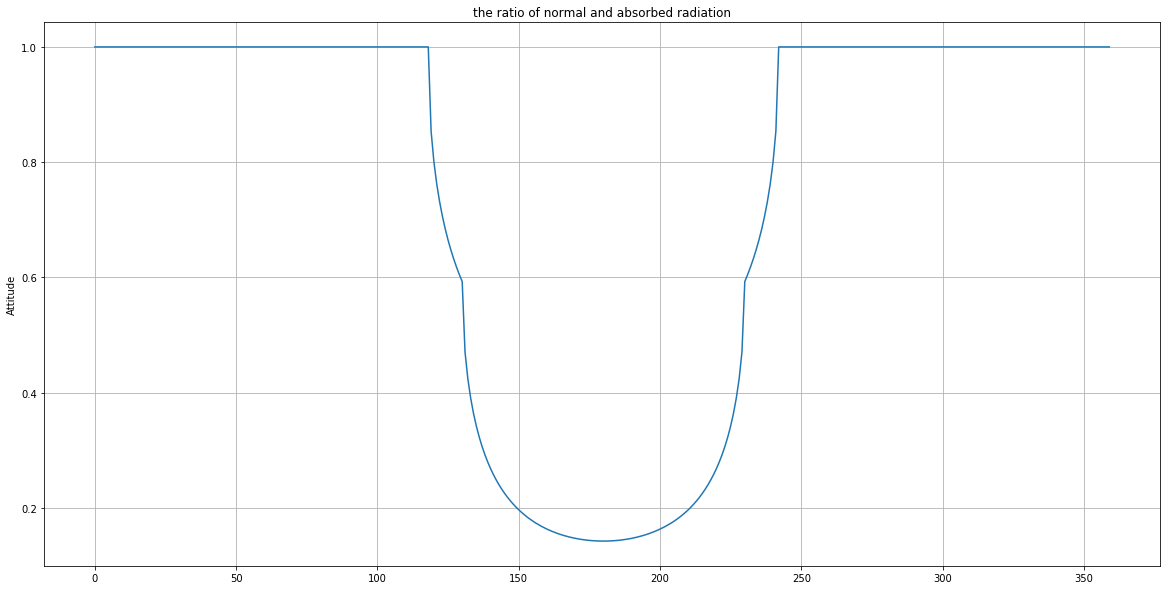

In [119]:
# монохроматика
plt.figure(figsize=(20,10))

j = 5
Teor = []
l = []

for i in range(0, m, 1):
    Teor.append(Mas[j][i]/Mas[j][0])
    l.append(i)


plt.hold(True)
plt.plot(l, Teor)
plt.grid(True)
plt.legend(loc=0)
plt.title('the ratio of normal and absorbed radiation')
#plt.xlabel('Energy(KeV)')
plt.ylabel('Attitude')

C:\Artem\python3.6\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if sys.path[0] == '':
C:\Artem\python3.6\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Artem\python3.6\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


Text(0,0.5,'Attitude')

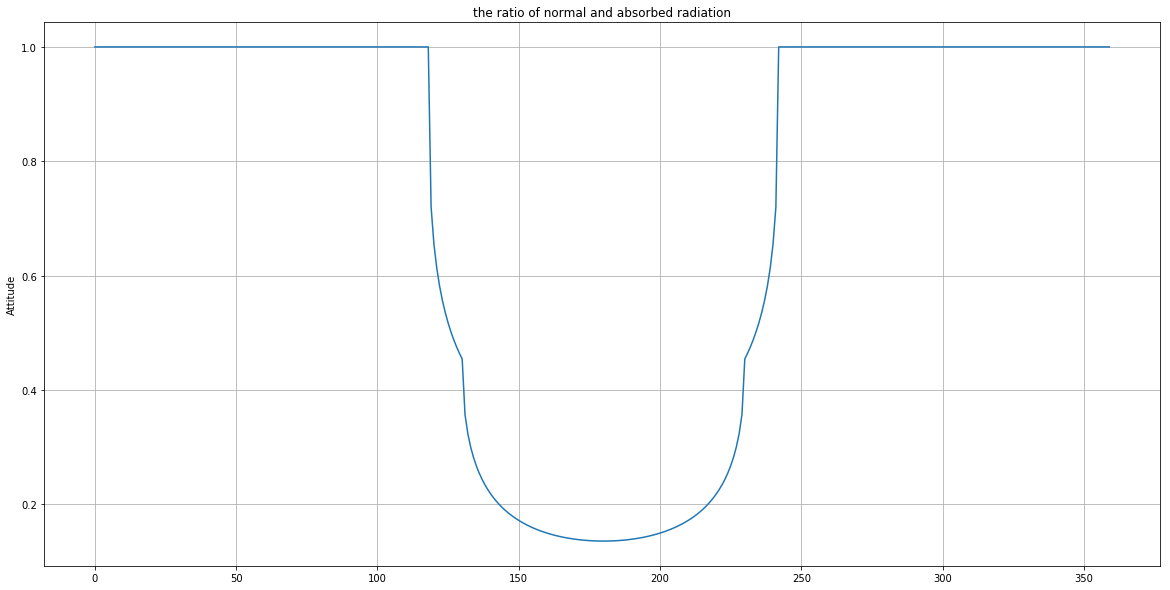

In [120]:
# полихроматика
plt.figure(figsize=(20,10))

j = 5
TeorPoli = []
l = []

for i in range(0, m, 1):
    TeorPoli.append(MasPoli[j][i]/MasPoli[j][0])


plt.hold(True)
plt.plot(TeorPoli)
plt.grid(True)
plt.legend(loc=0)
plt.title('the ratio of normal and absorbed radiation')
#plt.xlabel('Energy(KeV)')
plt.ylabel('Attitude')

In [121]:
#A = glob('C:\Users\Art\Downloads\contr\data*.txt')
#A1 = glob('C:\Users\Art\Downloads\contr\empty*.txt')
A = glob('data*.txt')

C:\Artem\python3.6\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Artem\python3.6\lib\site-packages\matplotlib\__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Artem\python3.6\lib\site-packages\matplotlib\rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


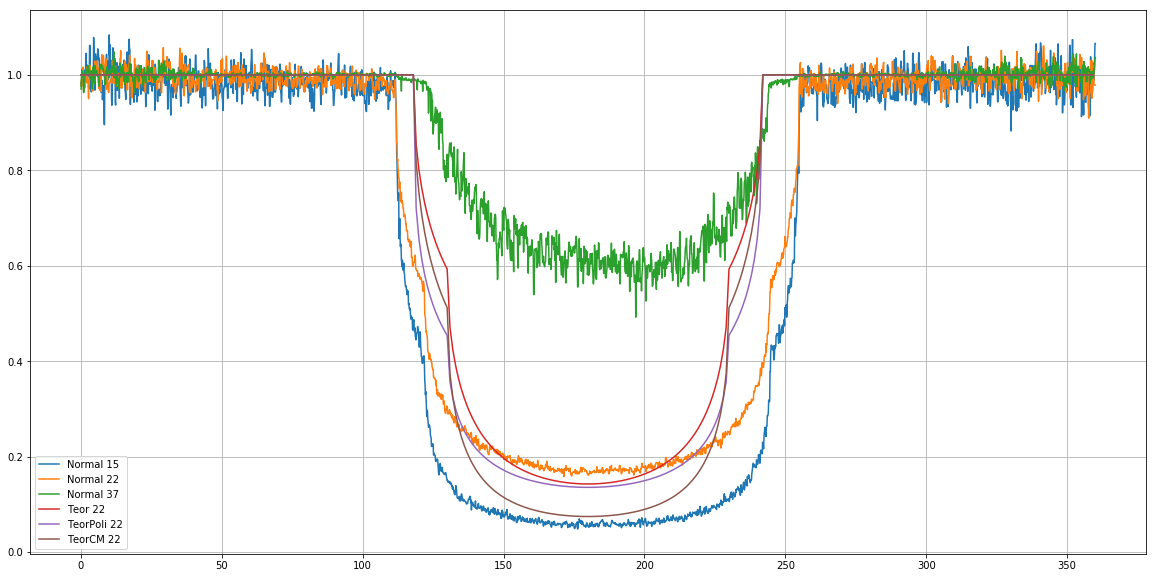

In [122]:
plt.figure(figsize=(20,10))
plt.hold(True)
plt.grid(True)

tmp = 360./3000
width = []

for i in range(1, 3001, 1):
    width.append(tmp*i) #координата по оси Х

for AA in [A[0], A[7], A[14]]:
    AAA = np.loadtxt(AA)
    cut_data = AAA[AAA.shape[0]//2]
    cut_data = scipy.signal.medfilt(cut_data, kernel_size=3)
    AA = AA.replace("data","empty")
    AAA = np.loadtxt(AA)
    cut_empty = AAA[AAA.shape[0]//2]
    cut_empty = scipy.signal.medfilt(cut_empty, kernel_size=3)
    AA = AA.replace("empty", "dark")
    AAA = np.loadtxt(AA)
    cut_dark = AAA[AAA.shape[0]//2]
    cut_dark = scipy.signal.medfilt(cut_dark, kernel_size=3)
    plt.plot(width, (cut_data - cut_dark)/(cut_empty - cut_dark), label = 'Normal ' + AA[-9:-7])

plt.plot(Teor, label = 'Teor ' + str(Ekr))
plt.plot(TeorPoli, label = 'TeorPoli ' + str(Ekr))
plt.plot(TeorCM, label = 'TeorCM ' + str(Ekr))
plt.legend(loc=0)
#plt.title('Spectrs')
#plt.xlabel('Energy(KeV)')
#plt.ylabel('Intensity')

In [123]:
len(TeorPoli)

360

In [124]:
len(cut_data)

3000

In [125]:
len(Teor)

360

In [126]:
t = len(cut_data)/m
Exp = (cut_data - cut_dark)/(cut_empty - cut_dark)
Dteor = 0
Dpoli = 0
Dcm = 0
for i in range(0, m, 1):
    Dteor = Dteor + abs(float(Exp[round(i*t)]) - float(Teor[i]))
    Dpoli = Dpoli + abs(float(Exp[round(i*t)]) - float(TeorPoli[i]))
    Dcm = Dcm + abs(float(Exp[round(i*t)]) - float(TeorCM[i]))
print(Dteor, Dpoli, Dcm)
    #print(i, round(i*t), i*t)

47.83250749942093 54.24454408726673 57.42753967011356
